http://blog.naver.com/PostView.nhn?blogId=htblog&logNo=221510551432&parentCategoryNo=&categoryNo=99&viewDate=&isShowPopularPosts=true&from=search

In [7]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

import pyautogui

In [8]:
class Conv(tf.keras.Model):
    def __init__(self, num_filters, kernel_size):
        super(Conv, self).__init__()
        ## 코드 시작 ##
        self.conv = tf.keras.layers.Conv2D(filters=num_filters,kernel_size=[kernel_size, kernel_size],padding='Same')
        self.bn = tf.keras.layers.BatchNormalization()
        self.relu = tf.keras.layers.ReLU()
        self.pool = tf.keras.layers.MaxPool2D(pool_size=(2,2))
        self.dropout = tf.keras.layers.Dropout(0.25)
        ## 코드 종료 ##

    def call(self, inputs, training=True):
        ## 코드 시작 ##
        x = self.conv(inputs)    # self.conv forward
        x = self.bn(x)    # self.bn   forward
        x = self.relu(x)    # self.relu forward
        x = self.pool(x)    # self.pool forward
        x = self.dropout(x)
        ## 코드 종료 ##

        return x

In [9]:
class SimpleCNN(tf.keras.Model):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        ## 코드 시작 ##
        self.conv1 = Conv(32,5)
        self.conv2 = Conv(64,3)

        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(units=256,activation=tf.nn.relu)
        self.dropout = tf.keras.layers.Dropout(0.25)
        self.dense2 = tf.keras.layers.Dense(units=num_classes,activation=tf.nn.softmax)
        ## 코드 종료 ##

    def call(self, inputs, training=True):
        ## 코드 시작 ##
        x = self.conv1(inputs)    # self.conv1 forward
        x = self.conv2(x)    # self.conv2 forward
        x = self.flatten(x)    # flatten 
        x = self.dense1(x)    # self.dense1 forward
        x = self.dropout(x)
        x = self.dense2(x)    # self.dense2 forward
        ## 코드 종료 ##

        return x

In [10]:
num_classes=9

model = SimpleCNN()
model.load_weights(tf.train.latest_checkpoint('./trained_model'))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

tf.Tensor(
[[3.3575664e-29 4.1728567e-29 3.7809284e-26 1.1586947e-28 1.8203157e-31
  3.5494332e-31 1.0000000e+00 1.1156790e-29 1.2551712e-30]
 [9.0501532e-30 1.3092176e-27 1.4027485e-35 1.0000000e+00 3.4485966e-32
  5.3367982e-29 3.2573452e-29 6.2391447e-26 4.9382880e-31]
 [7.6161258e-11 2.0908394e-12 3.4642053e-11 6.9736168e-09 5.2398685e-10
  2.1500775e-13 4.8477249e-09 1.0000000e+00 1.5023252e-09]], shape=(3, 9), dtype=float32)
[7 4 8]


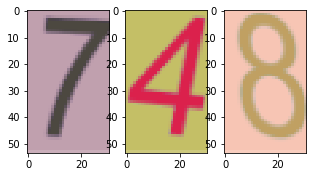

In [11]:
im = pyautogui.screenshot(region=(1000,278, 105, 54))

all_number = np.array(im)

first_number = all_number[:,1:32]/255.
second_number = all_number[:,37:68]/255.
third_number = all_number[:,71:102]/255.

fig = plt.figure(figsize=(5, 5))
p = fig.add_subplot(1, 3, 1)
p.imshow(first_number)
p = fig.add_subplot(1, 3, 2)
p.imshow(second_number)
p = fig.add_subplot(1, 3, 3)
p.imshow(third_number)

first_number_extension = np.expand_dims(first_number,axis=0)
second_number_extension = np.expand_dims(second_number,axis=0)
third_number_extension = np.expand_dims(third_number,axis=0)

number_array = np.concatenate((first_number_extension,second_number_extension),axis=0)
number_array = np.concatenate((number_array,third_number_extension),axis=0)

result = model(number_array[0:3])

print(result)

print(np.argmax(result,axis=1)+1)

In [6]:
import time

waiting_time=3

iter_times=1

print("detect and input will begin in {} seconds..".format(waiting_time))

for i in range(waiting_time,0,-1):
    print("{} second remaining...".format(i))
    time.sleep(1)

for i in range(iter_times):
    im = pyautogui.screenshot(region=(1000,278, 105, 54))

    all_number = np.array(im)

    first_number = all_number[:,1:32]/255.
    second_number = all_number[:,37:68]/255.
    third_number = all_number[:,71:102]/255.

    first_number_extension = np.expand_dims(first_number,axis=0)
    second_number_extension = np.expand_dims(second_number,axis=0)
    third_number_extension = np.expand_dims(third_number,axis=0)

    number_array = np.concatenate((first_number_extension,second_number_extension),axis=0)
    number_array = np.concatenate((number_array,third_number_extension),axis=0)

    result = model(number_array[0:3])

    keyboard_input = np.argmax(result,axis=1)+1

    pyautogui.typewrite(str(keyboard_input[0]) + str(keyboard_input[1]) + str(keyboard_input[2]))
    pyautogui.press('enter')
    
    time.sleep(1.5)

detect and input will begin in 3 seconds..
3 second remaining...
2 second remaining...
1 second remaining...
